In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/ett.csv')

In [ ]:
df.head(5)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    17420 non-null  object 
 1   HUFL    17420 non-null  float64
 2   HULL    17420 non-null  float64
 3   MUFL    17420 non-null  float64
 4   MULL    17420 non-null  float64
 5   LUFL    17420 non-null  float64
 6   LULL    17420 non-null  float64
 7   OT      17420 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000
mean,7.375141,2.242242,4.300239,0.881568,3.066062,0.856932,13.324672
std,7.067744,2.042342,6.826978,1.809293,1.164506,0.599552,8.566946
min,-22.705999,-4.756000,-25.087999,-5.934000,-1.188000,-1.371000,-4.080000
25%,5.827000,0.737000,3.296000,-0.284000,2.315000,0.670000,6.964000
50%,8.774000,2.210000,5.970000,0.959000,2.833000,0.975000,11.396000
75%,11.788000,3.684000,8.635000,2.203000,3.625000,1.218000,18.079000
max,23.643999,10.114000,17.341000,7.747000,8.498000,3.046000,46.007000


So, Oil Temperature will be our target variable, we will use the other as features to feed into our model for making predictions about the oil temperature

# **1. Data understanding and EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from scipy.stats import skew, kurtosis, zscore

# **1. Detailed Basic Statistics**


In [ ]:
df['date'] = pd.to_datetime(df['date'])

basic_stats = df['OT'].describe()
skewness = skew(df['OT'])
kurt = kurtosis(df['OT'])
detailed_stats = basic_stats.to_dict()
detailed_stats['skewness'] = skewness
detailed_stats['kurtosis'] = kurt
print("Detailed Basic Statistics:", detailed_stats)

Detailed Basic Statistics: {'count': 17420.0, 'mean': 13.324671589881694, 'std': 8.566946318051215, 'min': -4.079999923706056, '25%': 6.964000225067139, '50%': 11.395999908447266, '75%': 18.07900047302246, 'max': 46.00699996948242, 'skewness': 0.9681990350495362, 'kurtosis': 0.7777571002000969}


# **2. Time Series Trend Analysis with Rolling Averages**


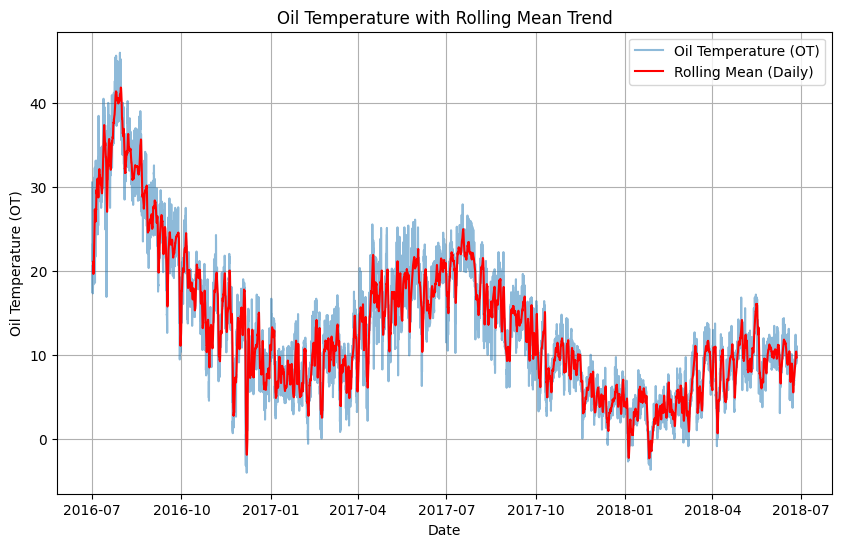

In [ ]:
df['rolling_mean'] = df['OT'].rolling(window=24).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['OT'], label='Oil Temperature (OT)', alpha=0.5)
plt.plot(df['date'], df['rolling_mean'], label='Rolling Mean (Daily)', color='red')
plt.title('Oil Temperature with Rolling Mean Trend')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.legend()
plt.grid(True)
plt.show()

# **3. Seasonality Analysis (Daily and Weekly decomposition)**


<Figure size 1200x800 with 0 Axes>

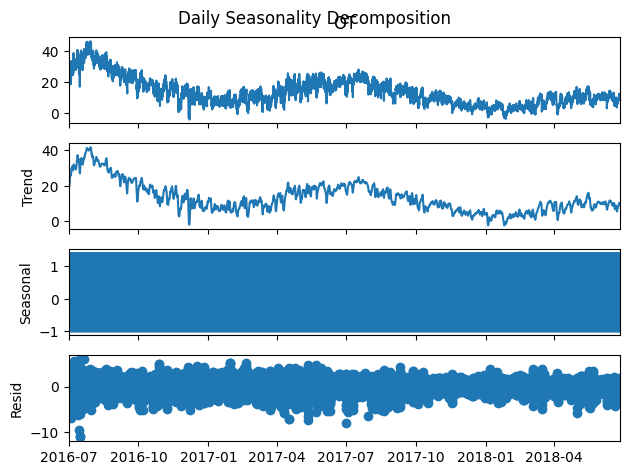

<Figure size 1200x800 with 0 Axes>

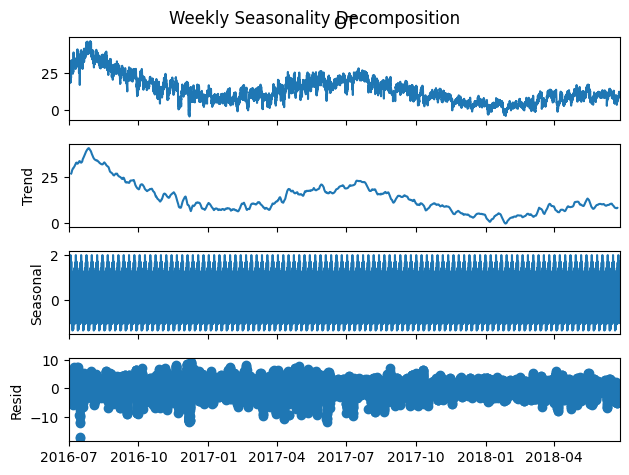

In [ ]:
decompose_result_daily = seasonal_decompose(df.set_index('date')['OT'], model='additive', period=24)
decompose_result_weekly = seasonal_decompose(df.set_index('date')['OT'], model='additive', period=24*7)

plt.figure(figsize=(12, 8))
decompose_result_daily.plot()
plt.suptitle('Daily Seasonality Decomposition')
plt.show()

plt.figure(figsize=(12, 8))
decompose_result_weekly.plot()
plt.suptitle('Weekly Seasonality Decomposition')
plt.show()


# **4. Outlier Detection using Z-scores and IQR**


In [ ]:
df['z_score'] = zscore(df['OT'])
outliers_zscore = df[df['z_score'].abs() > 3]

In [ ]:
# IQR method
Q1 = df['OT'].quantile(0.25)
Q3 = df['OT'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['OT'] < lower_bound) | (df['OT'] > upper_bound)]

# Displaying outliers summary
outliers_summary = {
    "z_score_outliers_count": outliers_zscore.shape[0],
    "iqr_outliers_count": outliers_iqr.shape[0],
    "z_score_outliers_indices": outliers_zscore.index.tolist(),
    "iqr_outliers_indices": outliers_iqr.index.tolist()
}
print("Outliers Summary:", outliers_summary)

Outliers Summary: {'z_score_outliers_count': 159, 'iqr_outliers_count': 471, 'z_score_outliers_indices': [279, 280, 281, 304, 399, 401, 488, 518, 519, 520, 521, 523, 536, 537, 538, 542, 543, 544, 545, 547, 559, 560, 561, 562, 563, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 604, 607, 608, 609, 610, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 628, 629, 631, 632, 633, 634, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 654, 655, 656, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 672, 674, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 717, 760, 761, 781, 875, 877, 878, 1192], 'iqr_outliers_indices': [157, 158, 159, 160, 256, 257, 273, 274, 275, 276, 277, 278, 279, 280, 28

# **2.Data preprocessing and feature engineering**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values)

df.interpolate(method='linear', inplace=True)

missing_values_after = df.isnull().sum()
print("Missing values after handling:\n", missing_values_after)


Missing values before handling:
 date    0
HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64
Missing values after handling:
 date    0
HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64


<ipython-input-6-6cc2d4245aa6>:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


# **3: Feature Engineering**


In [ ]:

for lag in range(1, 25):
    df[f'OT_lag_{lag}'] = df['OT'].shift(lag)

df['OT_rolling_mean_24'] = df['OT'].rolling(window=24).mean()
df['OT_rolling_std_24'] = df['OT'].rolling(window=24).std()

df['OT'] = np.clip(df['OT'], df['OT'].quantile(0.01), df['OT'].quantile(0.99))

df.dropna(inplace=True)

#df = df.drop(columns=['OT_lag_1', 'OT_lag_2', 'OT_lag_3', 'OT_lag_4', 'OT_lag_5', 'OT_lag_6', 'OT_lag_7', 'OT_lag_8','OT_lag_9','OT_lag_10','OT_lag_11',
#'OT_lag_12','OT_lag_13','OT_lag_14','OT_lag_15','OT_lag_16','OT_lag_17','OT_lag_18','OT_lag_19','OT_lag_20','OT_lag_21','OT_lag_22','OT_lag_23','OT_lag_24',
#'OT_rolling_mean_24', 'OT_rolling_std_24'])


In [ ]:
df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
48,2016-07-03 00:00:00,10.382,5.425,7.604,2.310,2.955,1.675,29.334999
49,2016-07-03 01:00:00,9.779,5.224,6.716,2.843,2.650,1.675,26.028000
50,2016-07-03 02:00:00,10.382,4.689,7.320,2.203,2.985,1.858,24.340000
51,2016-07-03 03:00:00,9.779,4.153,6.823,1.990,2.528,1.675,26.450001
52,2016-07-03 04:00:00,10.717,4.756,7.356,2.807,2.650,1.797,25.958000


# **4: Feature Scaling**



In [ ]:
scaled_columns = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']

# Normalizing the features
scaler = MinMaxScaler()
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

X = df.drop(columns=['date', 'OT'])
y = df['OT']

train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13897, 6)
X_test shape: (3475, 6)
y_train shape: (13897,)
y_test shape: (3475,)


# **Model selection and training**

In [ ]:
print("X_train.head():")
print(X_train.head())

print("y_train.head():")
print(y_train.head())

X_train.head():
        HUFL      HULL      MUFL      MULL      LUFL      LULL
48  0.713873  0.684667  0.770511  0.602588  0.427731  0.689608
49  0.700863  0.671150  0.749582  0.641547  0.396242  0.689608
50  0.713873  0.635171  0.763817  0.594766  0.430828  0.731039
51  0.700863  0.599126  0.752104  0.579197  0.383647  0.689608
52  0.721100  0.639677  0.764666  0.638915  0.396242  0.717229
y_train.head():
48    0.757077
49    0.671730
50    0.628166
51    0.682621
52    0.669924
Name: OT, dtype: float64


In [ ]:
def create_time_series(X, y, time_steps=24):
    Xs, ys = [], []
    if len(X) <= time_steps or len(y) <= time_steps:
        raise ValueError(f"X or y has fewer rows than time_steps ({time_steps}). Length of X: {len(X)}, y: {len(y)}")

    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y.iloc[i + time_steps])

    Xs = np.array(Xs)
    ys = np.array(ys)

    print(f"create_time_series: Generated {len(Xs)} samples with shape {Xs.shape}")

    return Xs, ys

try:
    y_train = y_train.reset_index(drop=True)

    X_train_rnn, y_train_rnn = create_time_series(X_train, y_train, time_steps=window_size)
    X_test_rnn, y_test_rnn = create_time_series(X_test, y_test, time_steps=window_size)

    print("Shape of X_train_rnn:", X_train_rnn.shape)
    print("Shape of y_train_rnn:", y_train_rnn.shape)
except ValueError as ve:
    print(f"Error during time series creation: {ve}")


create_time_series: Generated 13873 samples with shape (13873, 24, 6)
create_time_series: Generated 3451 samples with shape (3451, 24, 6)
Shape of X_train_rnn: (13873, 24, 6)
Shape of y_train_rnn: (13873,)


# **Model : RNN + LSTM**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, RNN, LSTM, SimpleRNN
from tensorflow.keras.optimizers import Adam

window_size = 24

X_train_rnn, y_train_rnn = create_time_series(X_train, y_train, time_steps=window_size)
X_test_rnn, y_test_rnn = create_time_series(X_test, y_test, time_steps=window_size)

print("Shape of X_train for RNN/LSTM:", X_train_rnn.shape)
print("Shape of y_train for RNN/LSTM:", y_train_rnn.shape)

model = Sequential()

model.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(window_size, X_train_rnn.shape[2])))

model.add(LSTM(50, activation='relu', return_sequences=False))

model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train_rnn, y_train_rnn, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test_rnn))

train_loss = model.evaluate(X_train_rnn, y_train_rnn)
test_loss = model.evaluate(X_test_rnn, y_test_rnn)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

create_time_series: Generated 13873 samples with shape (13873, 24, 6)
create_time_series: Generated 3451 samples with shape (3451, 24, 6)
Shape of X_train for RNN/LSTM: (13873, 24, 6)
Shape of y_train for RNN/LSTM: (13873,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 0.0431 - val_loss: 0.0204
Epoch 2/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0265 - val_loss: 0.0255
Epoch 3/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 0.0175 - val_loss: 0.0275
Epoch 4/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.0146 - val_loss: 0.0225
Epoch 5/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0115 - val_loss: 0.0241
Epoch 6/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.0114 - val_loss: 0.0229
Epoch 7/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.0137 - val_loss: 0.0292
Epoch 8/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.0100 - val_loss: 0.0237
Epoch 9/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 0.0088 - val_loss: 0.0255
Epoch 10/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0083 - val_loss: 0.0241
Epoch 11/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0082 - val_loss: 0.0264
Epoch 12/20
434/434 ━━━━━━━━━━

Let's try out other models for experimentation

# **CNN-LSTM Hybrid Model**

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, X_train_rnn.shape[2])))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(50, activation='relu'))

model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train_rnn, y_train_rnn, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test_rnn))

train_loss = model.evaluate(X_train_rnn, y_train_rnn)
test_loss = model.evaluate(X_test_rnn, y_test_rnn)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


434/434 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0493 - val_loss: 0.0581
Epoch 2/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0320 - val_loss: 0.0244
Epoch 3/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0245 - val_loss: 0.0179
Epoch 4/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0182 - val_loss: 0.0191
Epoch 5/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0175 - val_loss: 0.0193
Epoch 6/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0162 - val_loss: 0.0164
Epoch 7/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0130 - val_loss: 0.0100
Epoch 8/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0137 - val_loss: 0.0219
Epoch 9/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0130 - val_loss: 0.0198
Epoch 10/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0118 - val_loss: 0.0199
Epoch 11/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0109 - val_loss: 0.0183
Epoch 12/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/s

# **Bidirectional LSTM**

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()

model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=False), input_shape=(window_size, X_train_rnn.shape[2])))

model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train_rnn, y_train_rnn, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test_rnn))

train_loss = model.evaluate(X_train_rnn, y_train_rnn)
test_loss = model.evaluate(X_test_rnn, y_test_rnn)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


434/434 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 0.0507 - val_loss: 0.0418
Epoch 2/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - loss: 0.0348 - val_loss: 0.0198
Epoch 3/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - loss: 0.0247 - val_loss: 0.0329
Epoch 4/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0198 - val_loss: 0.0315
Epoch 5/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 0.0177 - val_loss: 0.0247
Epoch 6/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.0162 - val_loss: 0.0217
Epoch 7/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 0.0138 - val_loss: 0.0187
Epoch 8/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 0.0132 - val_loss: 0.0245
Epoch 9/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0133 - val_loss: 0.0164
Epoch 10/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - loss: 0.0136 - val_loss: 0.0125
Epoch 11/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 0.0117 - val_loss: 0.0152
Epoch 12/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 

# **Transformer-based Model**

In [ ]:
from tensorflow.keras.layers import Input, MultiHeadAttention, LayerNormalization, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer = Input(shape=(window_size, X_train_rnn.shape[2]))

attention_output = MultiHeadAttention(num_heads=4, key_dim=50)(input_layer, input_layer)
attention_output = LayerNormalization()(attention_output)

lstm_output = LSTM(50, activation='relu')(attention_output)

output_layer = Dense(1)(lstm_output)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train_rnn, y_train_rnn, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test_rnn))

train_loss = model.evaluate(X_train_rnn, y_train_rnn)
test_loss = model.evaluate(X_test_rnn, y_test_rnn)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)



Epoch 1/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 0.0515 - val_loss: 0.0457
Epoch 2/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 0.0421 - val_loss: 0.0417
Epoch 3/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - loss: 0.0349 - val_loss: 0.0229
Epoch 4/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.0274 - val_loss: 0.0211
Epoch 5/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 0.0187 - val_loss: 0.0278
Epoch 6/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 0.0173 - val_loss: 0.0210
Epoch 7/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - loss: 0.0145 - val_loss: 0.0248
Epoch 8/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 0.0143 - val_loss: 0.0201
Epoch 9/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - loss: 0.0136 - val_loss: 0.0184
Epoch 10/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 0.0110 - val_loss: 0.0280
Epoch 11/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 0.0132 - val_loss: 0.0194
Epoch 12/20
434/434 ━━━━━━━━━━

Based on performance we can see that Bi Directional LSTM performs better, maybe we could have explored more with the Transformer model, like with layer changes. Let's try it out now  

In [ ]:
from tensorflow.keras.layers import Input, MultiHeadAttention, LayerNormalization, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer = Input(shape=(window_size, X_train_rnn.shape[2]))

attention_output = MultiHeadAttention(num_heads=5, key_dim=50)(input_layer, input_layer)
attention_output = LayerNormalization()(attention_output)

lstm_output = LSTM(100, activation='relu')(attention_output)

output_layer = Dense(1)(lstm_output)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train_rnn, y_train_rnn, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test_rnn))

train_loss = model.evaluate(X_train_rnn, y_train_rnn)
test_loss = model.evaluate(X_test_rnn, y_test_rnn)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

Epoch 1/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - loss: 0.0533 - val_loss: 0.0376
Epoch 2/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 0.0451 - val_loss: 0.0382
Epoch 3/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: 0.0365 - val_loss: 0.0414
Epoch 4/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - loss: 0.0268 - val_loss: 0.0326
Epoch 5/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - loss: 0.0222 - val_loss: 0.0281
Epoch 6/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - loss: 0.0160 - val_loss: 0.0270
Epoch 7/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.0160 - val_loss: 0.0321
Epoch 8/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - loss: 0.0154 - val_loss: 0.0221
Epoch 9/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - loss: 0.0162 - val_loss: 0.0231
Epoch 10/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - loss: 0.0126 - val_loss: 0.0218
Epoch 11/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 0.0105 - val_loss: 0.0304
Epoch 12/20
434/434 ━━━━━━━━━━

In [ ]:
from tensorflow.keras.layers import Input, MultiHeadAttention, LayerNormalization, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer = Input(shape=(window_size, X_train_rnn.shape[2]))

attention_output = MultiHeadAttention(num_heads=6, key_dim=50)(input_layer, input_layer)
attention_output = LayerNormalization()(attention_output)

lstm_output = LSTM(100, activation='relu')(attention_output)

output_layer = Dense(1)(lstm_output)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train_rnn, y_train_rnn, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test_rnn))

train_loss = model.evaluate(X_train_rnn, y_train_rnn)
test_loss = model.evaluate(X_test_rnn, y_test_rnn)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

Epoch 1/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - loss: 0.0512 - val_loss: 0.0817
Epoch 2/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - loss: 0.0450 - val_loss: 0.0395
Epoch 3/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - loss: 0.0353 - val_loss: 0.0480
Epoch 4/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - loss: 0.0266 - val_loss: 0.0327
Epoch 5/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - loss: 0.0215 - val_loss: 0.0482
Epoch 6/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 0.0219 - val_loss: 0.0205
Epoch 7/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 0.0142 - val_loss: 0.0163
Epoch 8/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - loss: 0.0126 - val_loss: 0.0218
Epoch 9/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - loss: 0.0115 - val_loss: 0.0197
Epoch 10/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - loss: 0.0134 - val_loss: 0.0190
Epoch 11/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - loss: 0.0112 - val_loss: 0.0164
Epoch 12/20
434/434 ━━━━━━━━━━

In [ ]:
from tensorflow.keras.layers import Input, MultiHeadAttention, LayerNormalization, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer = Input(shape=(window_size, X_train_rnn.shape[2]))

attention_output = MultiHeadAttention(num_heads=6, key_dim=50)(input_layer, input_layer)
attention_output = LayerNormalization()(attention_output)

lstm_output = LSTM(50, activation='relu')(attention_output)

output_layer = Dense(1)(lstm_output)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train_rnn, y_train_rnn, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test_rnn))

train_loss = model.evaluate(X_train_rnn, y_train_rnn)
test_loss = model.evaluate(X_test_rnn, y_test_rnn)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

Epoch 1/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 0.0548 - val_loss: 0.0641
Epoch 2/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - loss: 0.0449 - val_loss: 0.0351
Epoch 3/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.0351 - val_loss: 0.0439
Epoch 4/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - loss: 0.0288 - val_loss: 0.0408
Epoch 5/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 0.0212 - val_loss: 0.0251
Epoch 6/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 0.0161 - val_loss: 0.0218
Epoch 7/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 0.0144 - val_loss: 0.0183
Epoch 8/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 0.0175 - val_loss: 0.0196
Epoch 9/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - loss: 0.0126 - val_loss: 0.0162
Epoch 10/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - loss: 0.0096 - val_loss: 0.0170
Epoch 11/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - loss: 0.0091 - val_loss: 0.0121
Epoch 12/20
434/434 ━━━━━━━━━━

In [ ]:
from tensorflow.keras.layers import Input, MultiHeadAttention, LayerNormalization, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer = Input(shape=(window_size, X_train_rnn.shape[2]))

attention_output = MultiHeadAttention(num_heads=7, key_dim=50)(input_layer, input_layer)
attention_output = LayerNormalization()(attention_output)

lstm_output = LSTM(150, activation='relu')(attention_output)

output_layer = Dense(1)(lstm_output)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train_rnn, y_train_rnn, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test_rnn))

train_loss = model.evaluate(X_train_rnn, y_train_rnn)
test_loss = model.evaluate(X_test_rnn, y_test_rnn)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

Epoch 1/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - loss: 0.0540 - val_loss: 0.0775
Epoch 2/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - loss: 0.0394 - val_loss: 0.0304
Epoch 3/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 33s 76ms/step - loss: 0.0313 - val_loss: 0.0492
Epoch 4/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 43s 81ms/step - loss: 0.0218 - val_loss: 0.0247
Epoch 5/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - loss: 0.0161 - val_loss: 0.0284
Epoch 6/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - loss: 0.0174 - val_loss: 0.0297
Epoch 7/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 0.0136 - val_loss: 0.0295
Epoch 8/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - loss: 0.0122 - val_loss: 0.0148
Epoch 9/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - loss: 0.0119 - val_loss: 0.0201
Epoch 10/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 34s 78ms/step - loss: 0.0112 - val_loss: 0.0220
Epoch 11/20
434/434 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - loss: 0.0105 - val_loss: 0.0237
Epoch 12/20
434/434 ━━━━━━━━━━

Tried a bunch of permutations, got close enough result with our Transformer model

# **Model evaluation and result analysis**

In [ ]:
y_train_pred = model.predict(X_train_rnn)
y_test_pred = model.predict(X_test_rnn)

y_train_pred = y_train_pred.reshape(-1)
y_test_pred = y_test_pred.reshape(-1)

y_train_rnn = y_train_rnn.reshape(-1)
y_test_rnn = y_test_rnn.reshape(-1)


434/434 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse_train = mean_squared_error(y_train_rnn, y_train_pred)
rmse_train = np.sqrt(mse_train)

mse_test = mean_squared_error(y_test_rnn, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"Train MSE: {mse_train}, Train RMSE: {rmse_train}")
print(f"Test MSE: {mse_test}, Test RMSE: {rmse_test}")


Train MSE: 0.0044972448927878845, Train RMSE: 0.06706150082415308
Test MSE: 0.025879391495389203, Test RMSE: 0.16087072914420822


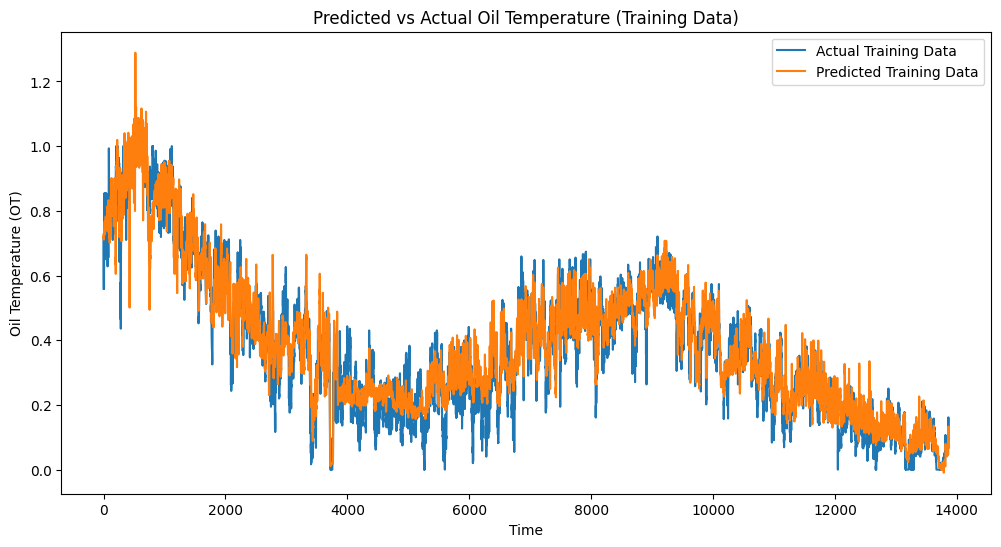

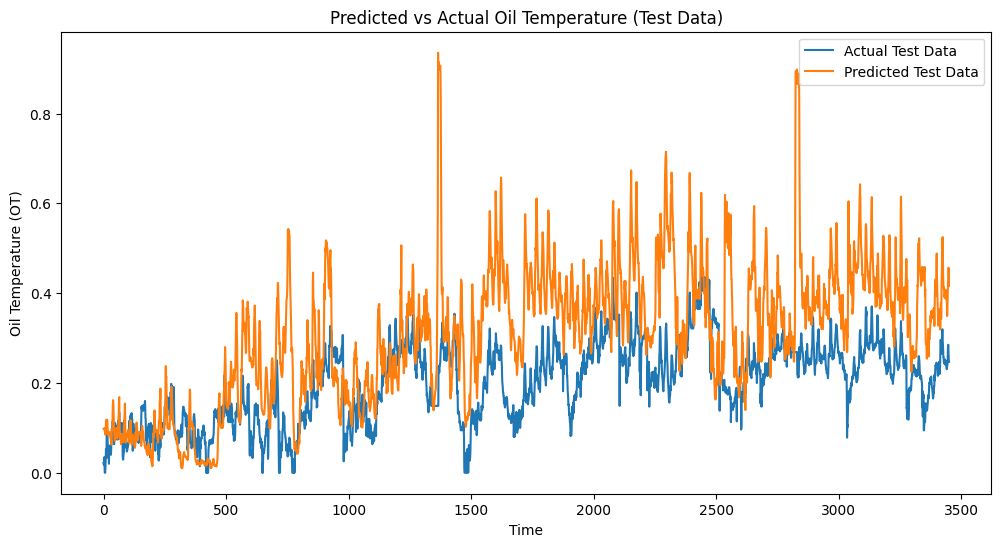

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_train_rnn, label="Actual Training Data")
plt.plot(y_train_pred, label="Predicted Training Data")
plt.title("Predicted vs Actual Oil Temperature (Training Data)")
plt.xlabel("Time")
plt.ylabel("Oil Temperature (OT)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test_rnn, label="Actual Test Data")
plt.plot(y_test_pred, label="Predicted Test Data")
plt.title("Predicted vs Actual Oil Temperature (Test Data)")
plt.xlabel("Time")
plt.ylabel("Oil Temperature (OT)")
plt.legend()
plt.show()


So we can see that the model performs good prediction on our dataset for Oil Temperature, the prediction of the LSTM is close enough to the actual values. We can use the Transformer architecture or other models we analysed up.  